# KNN classification

Decision boundary 시각화


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

In [3]:
# iris 데이터 로딩
iris = datasets.load_iris()

# we only take the first two features. We could avoid this ugly
# slicing by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target

In [4]:
print(iris.data.shape)
print(X.shape)

(150, 4)
(150, 2)


In [5]:
# meshgrid 만들기
h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

#np.meshgrid : 전체 범위를 격자 형태로 만듦, 전체 범위를 모두 점으로 표현하기 위해 사용
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

In [6]:
print(xx)
print(yy)
print(xx.shape)
print(yy.shape)

[[3.3  3.32 3.34 ... 8.84 8.86 8.88]
 [3.3  3.32 3.34 ... 8.84 8.86 8.88]
 [3.3  3.32 3.34 ... 8.84 8.86 8.88]
 ...
 [3.3  3.32 3.34 ... 8.84 8.86 8.88]
 [3.3  3.32 3.34 ... 8.84 8.86 8.88]
 [3.3  3.32 3.34 ... 8.84 8.86 8.88]]
[[1.   1.   1.   ... 1.   1.   1.  ]
 [1.02 1.02 1.02 ... 1.02 1.02 1.02]
 [1.04 1.04 1.04 ... 1.04 1.04 1.04]
 ...
 [5.34 5.34 5.34 ... 5.34 5.34 5.34]
 [5.36 5.36 5.36 ... 5.36 5.36 5.36]
 [5.38 5.38 5.38 ... 5.38 5.38 5.38]]
(220, 280)
(220, 280)


In [7]:
#KNN 모델 생성
n_neighbors = 15

clf = neighbors.KNeighborsClassifier(n_neighbors)
clf.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=15, p=2,
                     weights='uniform')

In [8]:
# xx.ravel() : 일차원 형태로 변경
Z = clf.predict(np.column_stack([xx.ravel(), yy.ravel()]))

In [9]:
Z = Z.reshape(xx.shape)

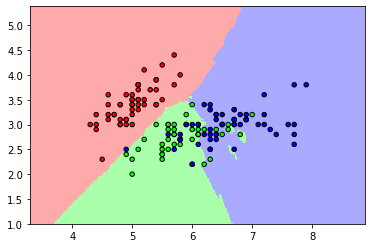

In [10]:
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)

# k-means
https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import cluster, datasets, metrics


In [34]:
iris = datasets.load_iris()

# we only take the first two features. We could avoid this ugly
# slicing by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target

In [35]:
kmeans = cluster.KMeans(n_clusters=3, random_state=0)
model = kmeans.fit(X)

In [36]:
y_pred = model.predict(X)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1,
       1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2], dtype=int32)

In [39]:
model.score(X)

-37.05070212765984